In [12]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
df= pd.read_csv("train_data_shenzhen.csv",encoding="utf-8",index_col = 0)
price_mean=df.iloc[:,-1].mean()
df1=df[df.iloc[:,-1]<price_mean*1.2]
df1.price = df1.price/df1.room_area
df1.head()
#df.shape

,num_bed_room,num_living_room,room_area,total_height,metro_distance,metro_number,CBD_distance,CBD_number,hosp_distance,hosp_number,...,district_坪山,district_宝安,district_布吉,district_盐田,district_福田,district_罗湖,district_龙华,district_龙岗,elevator_有电梯,price
0,1,1,44.3,11.0,1.082342,0.0,0.909746,2.0,1.720974,0.0,...,0,0,0,0,0,0,1,0,1,43.566591
1,3,1,11.0,12.0,0.401131,2.0,0.398228,3.0,1.509852,0.0,...,0,0,0,0,0,0,1,0,1,108.181818
2,3,1,13.0,9.0,0.875580,0.0,0.784649,0.0,1.231581,0.0,...,0,0,0,0,0,0,1,0,1,111.538462
3,1,1,49.0,23.0,0.853091,2.0,0.585308,3.0,1.608302,0.0,...,0,0,0,0,0,0,0,1,1,38.775510
4,3,1,13.0,6.0,0.790584,1.0,0.492287,2.0,0.851642,1.0,...,0,0,0,0,0,0,1,0,0,113.076923


In [13]:
n=df1.shape[0]
k=df1.shape[1]-1
x=df1.iloc[:,:k]
X=sm.add_constant(x)
y=df1.iloc[:,-1]
y_mean=y.mean()
model1=sm.OLS(y,X)
results1=model1.fit()
print(results1.summary())

d:\python\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     506.2
Date:                Sun, 19 Jan 2020   Prob (F-statistic):               0.00
Time:                        20:08:55   Log-Likelihood:                -10755.
No. Observations:                2626   AIC:                         2.157e+04
Df Residuals:                    2594   BIC:                         2.176e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               151.5899      6.54

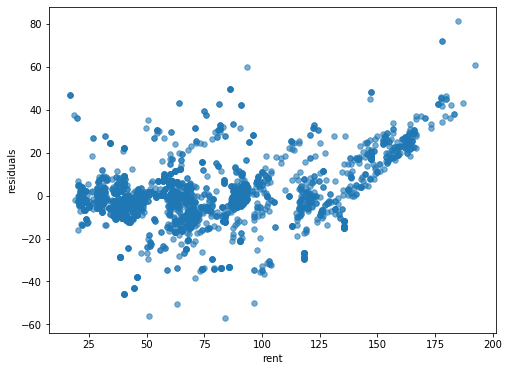

In [14]:
#x1=np.linspace(0,n-1,n)
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(y, y-results1.fittedvalues,s=30,alpha=0.6)
#plt.scatter(x1, results1.fittedvalues,s=30,c='r',label="OLS",alpha=0.6)

plt.xlabel("rent")
plt.ylabel("residuals")
plt.show()

In [46]:
X_new=X.iloc[:,[0,1,2,3,4,5,6,7,9,10,23,24,25,26,27,28,29,30,31,32,33]]
model2=sm.OLS(y,X_new)
results2=model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     292.5
Date:                Sun, 12 Jan 2020   Prob (F-statistic):               0.00
Time:                        21:19:41   Log-Likelihood:                -10534.
No. Observations:                2520   AIC:                         2.111e+04
Df Residuals:                    2499   BIC:                         2.123e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              90.5994      9.257     

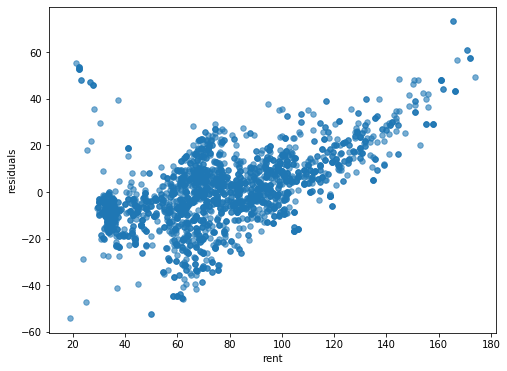

In [57]:
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(y, y-results2.fittedvalues,s=30,alpha=0.6)
#plt.scatter(x1, results2.fittedvalues,c='r',s=30,alpha=0.6,label="OLS")
plt.xlabel("rent")
plt.ylabel("residuals")
plt.show()

In [17]:
from sklearn.decomposition import PCA
contribution=np.cumsum(pca.explained_variance_ratio_)
contribution

array([0.87630564, 0.94967474, 0.97457835, 0.98377263, 0.98877263,
       0.99105156, 0.99258149, 0.99391997, 0.99483392, 0.99571078,
       0.99633326, 0.99693841, 0.99751735, 0.99799413, 0.99841104,
       0.99871455, 0.99897892, 0.9992055 ])

In [21]:
pca = PCA(n_components=25)
pca.fit(x)
reduced_x=pca.fit_transform(x)
reduced_X=sm.add_constant(reduced_x)
y_norm=(y-y.mean())/y.std()
model3=sm.OLS(y_norm,reduced_X)
results3=model3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     563.4
Date:                Sun, 19 Jan 2020   Prob (F-statistic):               0.00
Time:                        20:15:41   Log-Likelihood:                -1284.8
No. Observations:                2626   AIC:                             2622.
Df Residuals:                    2600   BIC:                             2774.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.748e-16      0.008  -2.26e-14      1.0

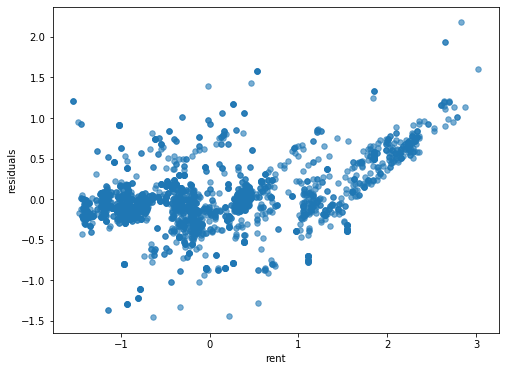

In [22]:
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(y_norm, y_norm-results3.fittedvalues,s=30,alpha=0.6)
#plt.scatter(x1, results3.fittedvalues,c='r',s=30,alpha=0.6,label="PCA")
plt.xlabel("rent")
plt.ylabel("residuals")
plt.show()

In [24]:
from sklearn.linear_model import Ridge,RidgeCV
#model = RidgeCV(alphas=[0.1, 1.0, 10.0])
model=RidgeCV(alphas=[0.1, 1.0, 10.0], cv=None, fit_intercept=True, scoring=None, normalize=True)
model.fit(x, y) 
print('系数矩阵:\n',model.coef_)
print('常数项:\n',model.intercept_)
print('线性回归模型:\n',model)
Ridge = model.predict(x)
print('最佳的alpha：',model.alpha_)

系数矩阵:
 [  9.47405471  -5.77457579  -0.58488969   0.12688197   1.24975213
   1.8310143    1.96937398   0.48047877   0.64255139   0.47017671
  -2.77456333  -0.0875113   -1.793888    -0.24176613  18.19393373
 -22.50015467  22.263318    -0.69408506  -1.80449659   0.10871847
  -1.9602966   22.78082485  20.6618027  -19.99442328 -22.50015467
 -19.49327415 -38.29128096   0.          -6.05429012 -19.26561233
 -32.1902449  -39.03625773  -1.95968511]
常数项:
 107.68997420982856
线性回归模型:
 RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=True, scoring=None, store_cv_values=False)
最佳的alpha： 0.1


No handles with labels found to put in legend.


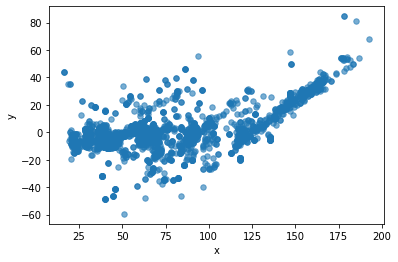

R_square： 0.8421109948231758
R_square_adjust： 0.8401008338776375


In [26]:
#plt.scatter(x1, y,label="data",s=30,alpha=0.6)
plt.scatter(y, y-Ridge,label="Ridge",s=30,alpha=0.6)
ax.legend(loc='best')
plt.xlabel("x")
plt.ylabel("y")
plt.show()
RSS=np.sum((y-Ridge)**2)
TSS=np.sum((y-y_mean)**2)
R_square_Ridge=1-RSS/TSS
R_adj_Ridge=1-(n-1)*(1-R_square_Ridge)/(n-k-1)
print('R_square：',R_square_Ridge)
print('R_square_adjust：',R_adj_Ridge)

In [27]:
from sklearn.linear_model import Lasso,LassoCV,LassoLarsCV 
#model = LassoCV(alphas=[0.1, 1.0, 10.0])
model=LassoCV(alphas=[0.001,0.01,0.1, 1.0, 10.0], cv=None, fit_intercept=True, normalize=True)
model.fit(x, y)
print('系数矩阵:\n',model.coef_)
print('常数项:\n',model.intercept_)
print('线性回归模型:\n',model)
LASSO = model.predict(x)
print('最佳的alpha：',model.alpha_)

系数矩阵:
 [ 9.48636236e+00 -8.17782226e+00 -5.85714695e-01  9.01015678e-02
  1.69893394e+00  9.41648122e-01  3.85453644e-02  5.49722589e-01
  1.12194564e+00  8.94514511e-01 -2.57023669e+00 -4.96862174e-01
 -1.53048793e+00 -0.00000000e+00  2.14910408e+01 -5.86451531e+01
  3.04576716e+01 -1.05094391e+00 -2.60849737e+00 -0.00000000e+00
 -3.03802484e+00  2.79415887e+01  2.60370360e+01 -2.10352454e+01
 -0.00000000e+00 -3.04315805e+01 -5.26629361e+01  0.00000000e+00
 -1.36184776e+01 -2.86303076e+01 -4.49965391e+01 -5.23289884e+01
 -1.28678726e+00]
常数项:
 122.09949595873336
线性回归模型:
 LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0], copy_X=True, cv=None, eps=0.001,
        fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=None,
        normalize=True, positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)
最佳的alpha： 0.001


No handles with labels found to put in legend.


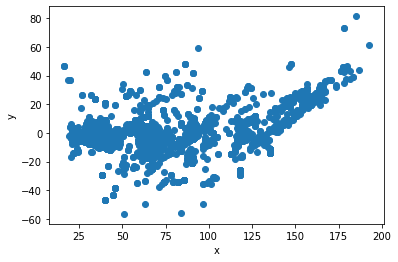

R_square： 0.8566995822059202
R_square_adjust： 0.8548751555904863


In [29]:
#plt.scatter(x1, y,label="data")
plt.scatter(y, y-LASSO,label="LASSO")
ax.legend(loc='best')
plt.xlabel("x")
plt.ylabel("y")
plt.show()
RSS_LASSO=np.sum((y-LASSO)**2)
TSS=np.sum((y-y_mean)**2)
R_square_LASSO=1-RSS_LASSO/TSS
R_adj_LASSO=1-(n-1)*(1-R_square_LASSO)/(n-k-1)
print('R_square：',R_square_LASSO)
print('R_square_adjust：',R_adj_LASSO)